# LAB 3 Computer Vision (Spitkovska Vladyslava)

In [1]:
!pip install tensorflow torch matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 48.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import zipfile
import os
import torch
from torchvision import datasets, transforms
from collections import Counter
import matplotlib.pyplot as plt
import random
from torch.utils.data import DataLoader, random_split

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
zip_path = "/content/drive/MyDrive/Animals-10.zip"
extract_folder = "/content/dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)


print("📂 Folder structure after extraction:")
for root, dirs, files in os.walk(extract_folder):
    print(root, len(dirs), len(files))

translation_dict = {
    "cane": "dog",
    "cavallo": "horse",
    "elefante": "elephant",
    "farfalla": "butterfly",
    "gallina": "chicken",
    "gatto": "cat",
    "mucca": "cow",
    "pecora": "sheep",
    "ragno": "spider",
    "scoiattolo": "squirrel"
}


📂 Folder structure after extraction:
/content/dataset 2 1
/content/dataset/raw-img 10 0
/content/dataset/raw-img/scoiattolo 0 1862
/content/dataset/raw-img/gatto 0 1668
/content/dataset/raw-img/elefante 0 1446
/content/dataset/raw-img/gallina 0 3098
/content/dataset/raw-img/pecora 0 1820
/content/dataset/raw-img/ragno 0 4821
/content/dataset/raw-img/mucca 0 1866
/content/dataset/raw-img/cavallo 0 2623
/content/dataset/raw-img/cane 0 4863
/content/dataset/raw-img/farfalla 0 2112
/content/dataset/__pycache__ 0 1


Вище додали переклад стовпців (код зі словником є в оригінальній зіпці, але я трошки видозмінила його, викинувши інвертовані дублікати)

In [49]:
dataset_path = os.path.join(extract_folder, "raw-img")

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

dataset = datasets.ImageFolder(root=dataset_path, transform=transform)


In [50]:
original_classes = dataset.classes
translated_classes = [translation_dict.get(cls, cls) for cls in original_classes] # splitted into 3 subsets as requested
dataset.class_to_idx = {translated_classes[i]: v for i, (k, v) in enumerate(dataset.class_to_idx.items())}

print(f"Dataset contains {len(dataset)} images across {len(dataset.classes)} classes.")
print(f"Classes after translation: {translated_classes}")

Dataset contains 26179 images across 10 classes.
Classes after translation: ['dog', 'horse', 'elephant', 'butterfly', 'chicken', 'cat', 'cow', 'sheep', 'spider', 'squirrel']


Супер, тепер класи перекладені, загальна кількість виведена.

In [51]:
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

In [52]:
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

Обираю оптимальне значення розміру батч (як було у попередній роботі, так і лишила)

In [53]:
print(f"DataLoader created:")
print(f"Train set: {len(train_dataset)} images")
print(f"Validation set: {len(val_dataset)} images")
print(f"Test set: {len(test_dataset)} images")

DataLoader created:
Train set: 18325 images
Validation set: 3926 images
Test set: 3928 images


# Проаналізуйте якість даних, перевірте на наявність зашумлень або незбалансованих класів

In [78]:
def check_image_quality(dataset, num_samples=100):
    plt.close('all')

    brightness_values = []

    for i in range(min(num_samples, len(dataset))):
        img, _ = dataset[i]
        img_np = img.numpy().transpose((1, 2, 0))  # сonvert to numpy
        brightness = np.mean(img_np)  # avg image brightness
        brightness_values.append(brightness)

    plt.figure(figsize=(10, 5))
    plt.hist(brightness_values, bins=20, color='lightcoral', edgecolor='black')
    plt.xlabel('Average Brightness')
    plt.ylabel('Number of Images')
    plt.title('Histogram of Image Brightness')
    plt.show()

    print(f"Minimum brightness: {np.min(brightness_values):.3f}")
    print(f"Maximum brightness: {np.max(brightness_values):.3f}")
    print(f"Average brightness: {np.mean(brightness_values):.3f}")


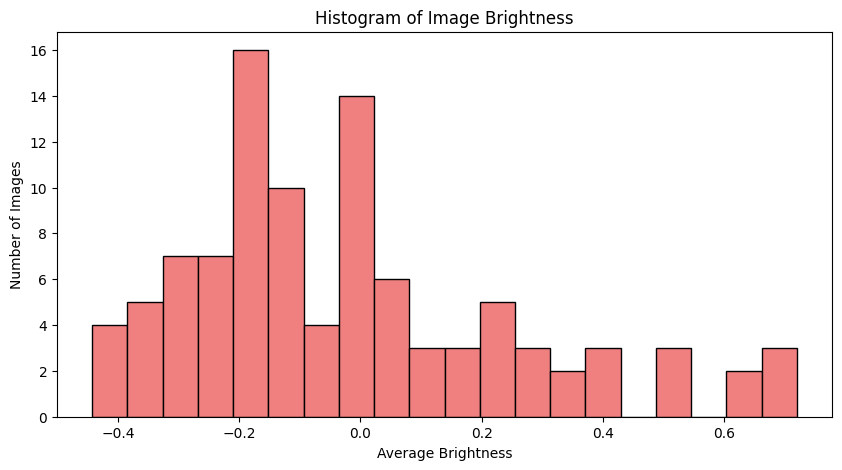

Minimum brightness: -0.442
Maximum brightness: 0.720
Average brightness: -0.017


In [79]:
check_image_quality(dataset)

Як можемо побачити, середнє значення яскравості близьке до нуля(це означатиме, що світлина збалансована), але межі в яких змінюється цей показник доволі великі.
Напр.: мінімальне значення майде -0.5, тобто дуже темні зображення. Тобто, в датасеті є зашумлення. Судячи з гістограми, затемнених більше, ніж нормальнимх. Перевіримо це нижче.

In [56]:
classes = ["dog","horse","elephant","butterfly","chicken","cat","cow", "sheep","spider","squirrel"]

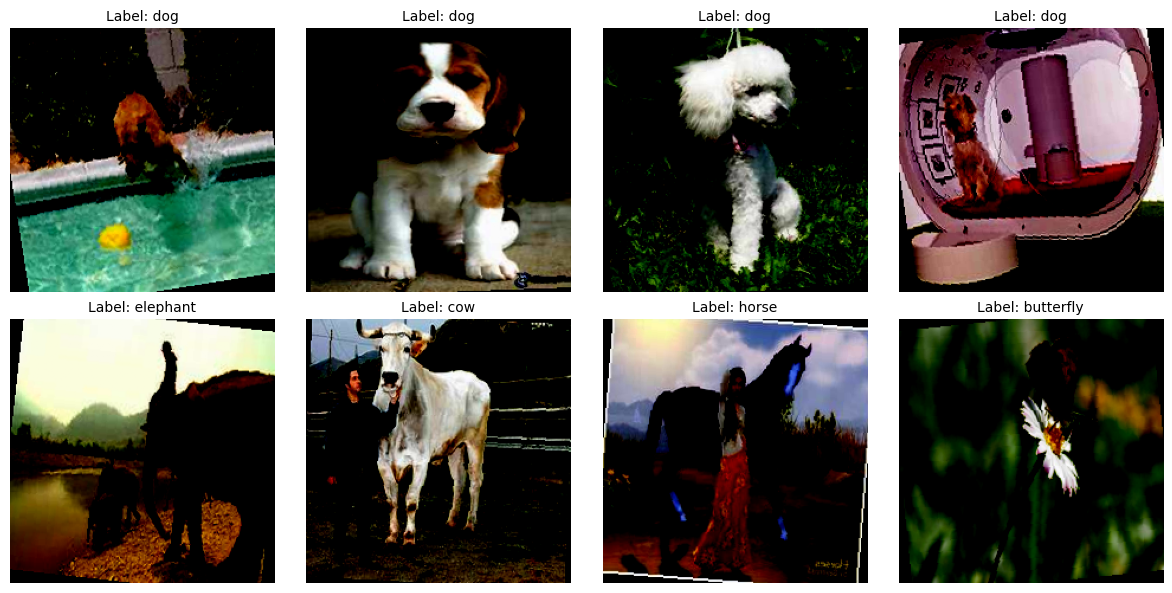

In [60]:
def visualize_examples(dataset, num_images, model=None, device="cpu", denormalize_transform=None, random_selection=False, show_predictions=False):
    # select pics
    indices = random.sample(range(len(dataset)), num_images) if random_selection else range(num_images)

    # prepare model
    if show_predictions and model is not None:
        model.eval()
        model.to(device)

    num_rows = int(np.ceil(num_images / 4))
    plt.figure(figsize=(12, 3 * num_rows))

    for i, idx in enumerate(indices):
        img, label = dataset[idx]

        img_tensor = img.unsqueeze(0).to(device)  # batch dimension

        # prediction if required
        predicted_label = None
        if show_predictions and model is not None:
            with torch.no_grad():
                logits = model(img_tensor)
                predicted_label = torch.argmax(logits, dim=1).item()

        # denormalization
        if denormalize_transform:
            img = denormalize_transform(img)

        #  ensor to numpy array
        np_img = img.numpy().transpose((1, 2, 0))
        np_img = np.clip(np_img, 0, 1)  # values are in [0, 1]
        label_value = label.item() if hasattr(label, 'item') else label

        title = f"Label: {classes[label_value]}"
        if show_predictions and predicted_label is not None:
            title += f"\nPred: {classes[predicted_label]}"

        plt.subplot(num_rows, 4, i + 1)
        plt.imshow(np_img)
        plt.title(title, fontsize=10)
        plt.axis('off')

    plt.tight_layout()
    plt.show()


visualize_examples(dataset, num_images=8, random_selection=True)

Бачимо, що справді, певні зашумлення присутні. Не всі картинки мають гарне відображення того, хто на них.

# Bізуалізуйте по декілька прикладів з різних класів;

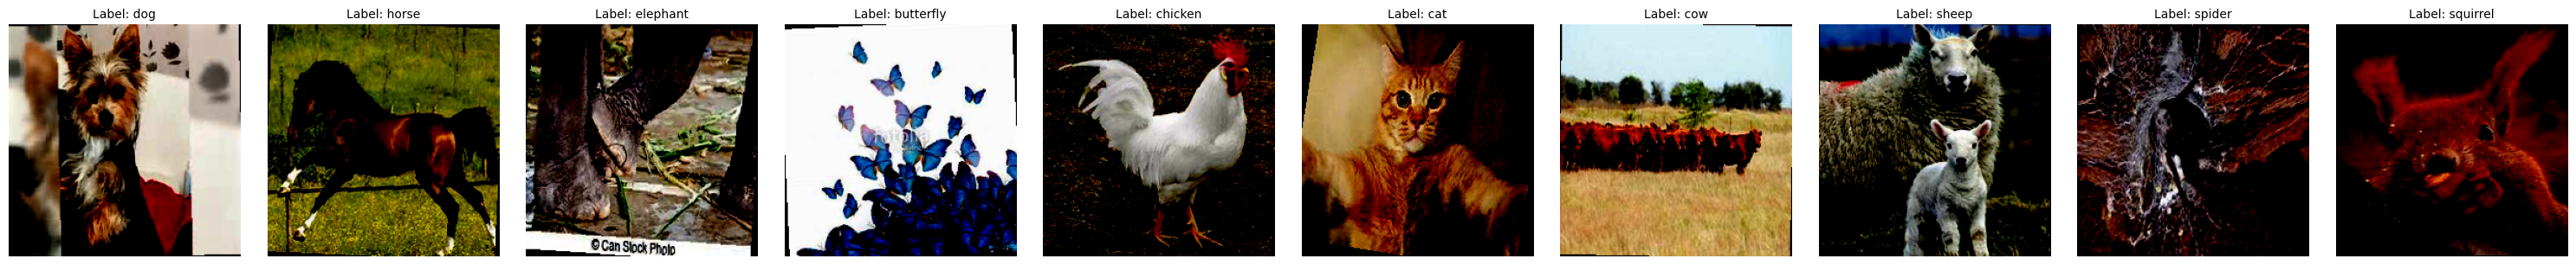

In [80]:
def visualize_one_example_per_class(dataset, classes,model=None, device="cpu"):
    class_to_image = {}

    for idx in range(len(dataset)):
        img, label = dataset[idx]
        if label not in class_to_image:
            class_to_image[label] = img
        if len(class_to_image) == len(classes):
            break

    num_classes = len(class_to_image)
    fig, axes = plt.subplots(1, num_classes, figsize=(num_classes * 3, 3))

    if num_classes == 1:
        axes = [axes]

    for ax, (class_idx, img) in zip(axes, class_to_image.items()):
        img_tensor = img.unsqueeze(0).to(device)

        predicted_label = None
        np_img = img.numpy().transpose((1, 2, 0))
        np_img = np.clip(np_img, 0, 1)
        title = f"Label: {classes[class_idx]}"
        ax.imshow(np_img)
        ax.set_title(title, fontsize=10)
        ax.axis("off")

    plt.tight_layout()
    plt.show()

visualize_one_example_per_class(dataset, classes)


Ось тут гарно видно, що у датаету багато проблем з фото: деякі з них зроблені початково вертикально, десь видно лише малу частину тіла тварини, і це не обличчя. Десь цих тварин багато і вони зливаються мід собою, десь з фоном. Висновок: у всіх класах присутні проблеми.

# Cтворіть графік (наприклад, гістограму), який відображає кількість зображень в кожному класі.

In [74]:
def check_class_balance(dataset):
    labels = [label for _, label in dataset]
    class_counts = Counter(labels)
    class_names = [classes[idx] for idx in class_counts.keys()]

    plt.figure(figsize=(10, 5))
    plt.bar(class_names, class_counts.values(), color='skyblue')
    plt.xlabel('Classes')
    plt.ylabel('Pics quantity')
    plt.title('Class disrbution')
    plt.xticks(rotation=45)
    plt.show()

    print("Pics disctribution per class:")
    for class_name, count in zip(class_names, class_counts.values()):
        print(f"{class_name}: {count} pictures")


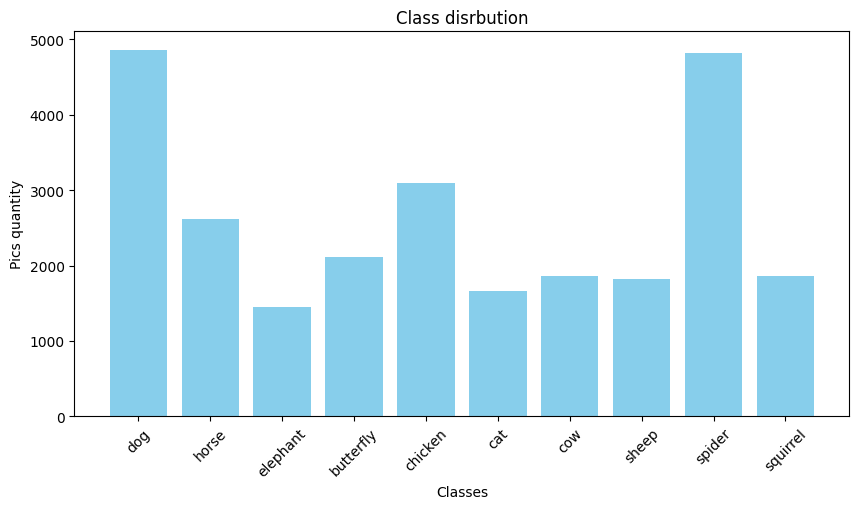

Pics disctribution per class:
dog: 4863 pictures
horse: 2623 pictures
elephant: 1446 pictures
butterfly: 2112 pictures
chicken: 3098 pictures
cat: 1668 pictures
cow: 1866 pictures
sheep: 1820 pictures
spider: 4821 pictures
squirrel: 1862 pictures


In [75]:
torch.manual_seed(42)  # Для відтворюваності результатів
check_class_balance(dataset)

В датасеті присутня незбалансованість класів, як видно з гістограми. Матимемо це на увазі надалі.

В цій роботі я оглядово пройшлась датасетом, аби зрозуміти, як треба планувати свої подальші кроки для наступної лаби. На жаль, в датасеті справдіє проблеми як з якістю, так і кількістю фото, тому надалі варто придумати, як більше уваги/значимості наділяти "слабшим" класам.

# Планування на наступну лабораторну
- Визначте метрики, за якими будете оцінювати ефективність моделі:
Враховуючи, що у мене проблеми з незбалансованістю класів та зашумленнями:

Balanced аccuracy – підходить для незбалансованих класів, бо враховує середню точність по кожному.

F1-score (macro) – обчислює гармонійне середнє precision та recall, якраз для випадків, коли в нас один клас має більше прикладів, ніж інші.

Precision, Recall – особливо важливі для класів із низькою представленістю. Якщо певний клас має мало зображень, recall допоможе оцінити, чи модель взагалі його розпізнає.

Confusion matrix - класика.

Log loss/крос-ентропія – оцінка невпевненості моделі.


- Заплануйте архітектуру нейронної мережі:
- Кількість згорткових шарів - 3-4, адже менша їх кількість може дати недостатньо хороший результат, а більша - призвести до перенавчання і втрати точності. Але побачимо, що вийде з цього. Остаточний вибір буде уточнено експериментально.;
- Активації - Для згорткових шарів – ReLU, оскільки це швидка та ефективна функція. Для вихідного шару – Softmax, бо завдання є багатокласовою класифікацією.;
- Кількість повноз’язних шарів - 2. Якщо мережа буде недостатньо потужною, додамо ще один шар.;
- Оптимізатор - SGD (з momentum), бо він може забезпечити хорошу узагальнюючу здатність. ADAM теж буду пробувати;
- Dropout - обов'язково додам, адже в нас складних датасет із зашумленнями,викидами, тож треба, аби модель не перенавчалась на них.
